# Tweet Sources

> Author: [Yalim Demirkesen](github.com/demirkeseny)

Packages used:
- pandas 0.23.4
- scikit-learn 0.20.0
- nltk 3.3
- matplotlib 3.0.2

In this notebook, I analyzed the most frequently used words from 2010 until 2012 on Twitter under having a condition of tweet including either `EversourceMA`, `EversourceNH`,`VelcoVT`,`nationalgridus`. The data is cleaned in the initial stage and then used for analysis.

In [1]:
# necessary libraries:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import wordnet

In [2]:
# uploading the data:
tweets = pd.read_csv('./data/monthlytweets_cleaned.csv')
tweets.head()

,timestamp,id,text,user,likes,replies,retweets,query
0,2012-11-01 23:50:22,264152432282578945,"Tom May, CEO of Northeast Utilities, the paren...",EversourceMA,1,1,3,EversourceMA OR EversourceNH OR VelcoVT OR nat...
1,2012-11-01 23:45:13,264151136792109056,@NYGovCuomo @lipanews @nationalgridus @nyseand...,readyforthenet,0,0,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...
2,2012-11-01 23:34:44,264148498352590849,Some amazing video from the Wareham microburst...,EversourceMA,1,0,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...
3,2012-11-01 23:34:20,264148399190851584,@nationalgridus Call me if you need some help ...,sparky1000,0,0,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...
4,2012-11-01 23:31:56,264147793147490304,Current PSNH statewide w/o power: 885. We're d...,EversourceNH,0,1,8,EversourceMA OR EversourceNH OR VelcoVT OR nat...


Below are the most frequent users in the file:

In [3]:
tweets['user'].value_counts().head(10)

nationalgridus     6081
EversourceNH       1991
NGPowerofAction     381
EversourceMA        198
Andruzzi63          115
national_grid       111
Breedon             110
joeandruzzifndn     106
BillericaPD          80
ToSaveEnergy         67
Name: user, dtype: int64

When we checked the accounts that shared a tweet about power outages, the fifth most frequent user is Joe Andruzzi, a former NFL player. Let's check this tweet content:

In [4]:
tweets[tweets['user'] == 'Andruzzi63']['text'][0:5]

362    Thank you! #touchdownsbytom  RT @ZachGelb9: @A...
366    Who is going to miss #touchdownsbytom ? @natio...
409    I am honored & proud of @nationalgridus as a @...
706    @nationalgridus @millennium_US haha MT @PeterR...
715    Thank you @nationalgridus for being an amazing...
Name: text, dtype: object

Just like it can be seen from the above posts, Joe is tweeting for New England Patriots including @nationalgridus because they are the sponsors of Patriots.

Or there might be some angry customers:

In [5]:
tweets[tweets['user'] == 'Breedon']['text'][49:54]

14258    NOT GOOD ENOUGH! RT @nationalgridus @sprinter4...
14284    Hey @nationalgridus - u deleted my facebook wa...
14293    SMH RT @sprinter4883: @nationalgridus http://y...
14298    @nationalgridus U know i can see every1 that w...
14305    @DJFuture: @Breedon still no power?! shiiiiiii...
Name: text, dtype: object

Having angry customers or former NFL players tweeting for sponsorship deals might not be the best for our model. So they need to be found out and listed so that we can generate a list of words that are more frequently used in irrelevant posts.

Before starting to extract data, I need to check the most frequently used words in the tweets.

In [6]:
vect = CountVectorizer(stop_words='english', )
X = vect.fit_transform(tweets['text'])
text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
text.index = tweets['timestamp']
text.head()

,00,000,000240,000458,000k,001,0019bb2963f4,0020,0042,0045,...,ليخسره,ليس,مرسي,مصر,منشم,والعنف,والقهر,ورا,يا,ღmade
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-11-01 23:50:22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:45:13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:34:44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:34:20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:31:56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We need to exclude the arabic contents from the analysis since we cannot analyze them!

In [7]:
# include all the arabic words that are used in the dataset.
non_eng = text.columns[20385:].tolist()
non_eng

['إستخدام',
 'احنا',
 'الإستبداد',
 'البلد',
 'الديمقراطية',
 'تحرير',
 'خطأ',
 'دي',
 'سياسي',
 'شعب',
 'شيء',
 'ضد',
 'فاضح',
 'لحد',
 'لديه',
 'ليخسره',
 'ليس',
 'مرسي',
 'مصر',
 'منشم',
 'والعنف',
 'والقهر',
 'ورا',
 'يا',
 'ღmade']

In [8]:
def common_data(list1, list2): 
    result = 0
  
    # traverse in the 1st list 
    for x in list1: 
  
        # traverse in the 2nd list 
        for y in list2: 
    
            # if one common 
            if x == y: 
                result = 1
                
    return(result) 

In [9]:
# create an empty list to store the indexes of the rows to exclude
to_exclude = []
counter = 0
# run through each row to decide what rows include any value from the non_eng list
for i in range(0,len(tweets)):
    # if there is any value from non_eng list, the if clause generates 1.
    if common_data(tweets.text[i].split(), non_eng) == 1:
        # if 1 is generated, then it is appended to the empty list.
        to_exclude.append(i)
    else:
        continue

In [10]:
tweets.shape

(20160, 8)

In [11]:
tweets.drop(to_exclude, inplace=True)

In [12]:
tweets.shape

(20159, 8)

In [13]:
# A count vectorizer is created under the name of vect and the stop words are removed
vect = CountVectorizer(stop_words='english', )

# All the tweet content is fitted into the vectorizer
X = vect.fit_transform(tweets['text'])

# All this series are attached to the dataframe called text
text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

# index is changed to the timestamp
text.index = tweets['timestamp']
text.head()

,00,000,000240,000458,000k,001,0019bb2963f4,0020,0042,0045,...,zyrc8k,zz1dt0,zz6v,zznj5e,zzrxvn,ôl,örebro,östergötland,ər,ღmade
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-11-01 23:50:22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:45:13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:34:44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:34:20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:31:56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The row that included all the arabic words is deleted!

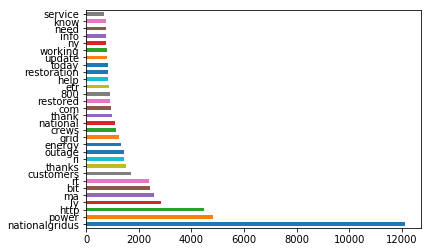

In [14]:
%matplotlib inline
text.sum().sort_values(ascending = False).head(30).plot(kind = 'barh');

In [15]:
freq_all = pd.DataFrame(text.sum().sort_values(ascending = False).head(30), columns=['amount'])

In [16]:
freq_all['words'] = freq_all.index
freq_all.reset_index(inplace = True, drop = True)

Below is the frequency chart of the words and their mentioning counts:

In [17]:
freq_all

,amount,words
0,12129,nationalgridus
1,4840,power
2,4478,http
3,2835,ly
4,2562,ma
5,2413,bit
6,2371,rt
7,1707,customers
8,1515,thanks
9,1437,ri


All these words are shown in the horizontal bar chart. 

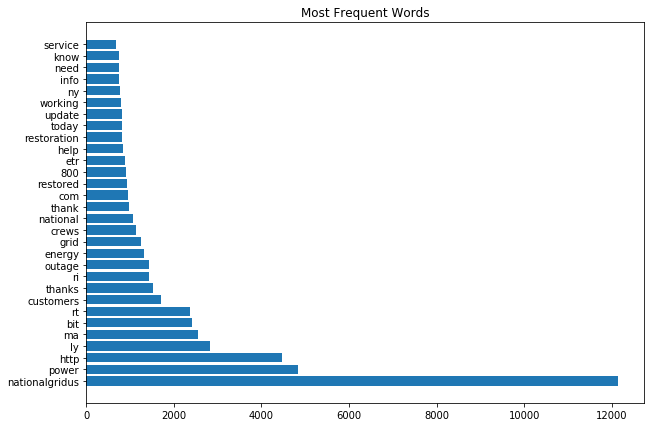

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title('Most Frequent Words')
plt.barh(freq_all['words'], freq_all['amount'], align = 'center');

Let's do the same analysis for the words after we exclude the accounts that are irrelevantly using same of our keywords that are used to grab the tweets.

Let's check the most frequent users once again:

In [19]:
tweets['user'].value_counts().head(30)

nationalgridus     6081
EversourceNH       1991
NGPowerofAction     381
EversourceMA        198
Andruzzi63          115
national_grid       111
Breedon             110
joeandruzzifndn     106
BillericaPD          80
ToSaveEnergy         67
Jackie500            62
CodyHopkins          60
lowfoot              55
sprinter4883         54
srinisankar          45
wallabywayyy         40
TyngsboroughMA       38
AndreaWBZ            37
HeartShare           37
Dedprez11            36
noternie             35
acraftymitch         35
st0ut717             34
divajla              34
smartwattinc         34
MelrosePatch         32
mktobin              29
mnrochelle           28
HarderServices       27
Chines               27
Name: user, dtype: int64

The accoAfter taking a deeper look, I decided to take the following accounts out when I look for the most frequent words:
- Andruzzi63          
- Breedon 
- joeandruzzifndn          
- lowfoot
- HeartShare
- smartwattinc  

The reason of excluding them is that they are either accounts that have some sort of sponsorship deal or refer to one of the energy providers for advertisement purposes.

In [20]:
user_exc = ['Andruzzi63', 'Breedon', 'joeandruzzifndn', 'lowfoot', 'HeartShare', 'smartwattinc']

In [21]:
tweets_exc = tweets.loc[~tweets['user'].isin(user_exc)]

In [22]:
tweets_exc.shape

(19702, 8)

In [23]:
X_exc = vect.fit_transform(tweets_exc['text'])
text_exc = pd.DataFrame(X_exc.toarray(), columns=vect.get_feature_names())
text_exc.index = tweets_exc['timestamp']

In [24]:
freq_exc = pd.DataFrame(text_exc.sum().sort_values(ascending = False).head(40), columns=['amount'])

In [25]:
freq_exc['words'] = freq_exc.index
freq_exc.reset_index(inplace = True, drop = True)

The same analysis is run excluding the accounts that might create a bias.

In [26]:
freq_exc

,amount,words
0,11672,nationalgridus
1,4799,power
2,4327,http
3,2730,ly
4,2560,ma
5,2339,bit
6,2289,rt
7,1699,customers
8,1464,thanks
9,1434,ri


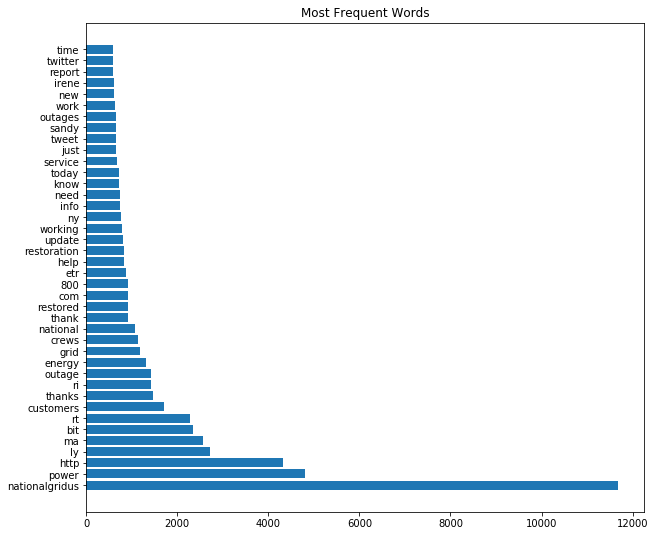

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.title('Most Frequent Words')
plt.barh(freq_exc['words'], freq_exc['amount'], align = 'center');

Now we will check the network between the twitter users. The key areas to pay attention to

In [28]:
tweets.to_csv('./data/monthlytweets_cleaned_2.csv')

# Frequency Charts When an Outage Happened

For the frequency chart it might be more important to check the frequency of the words that are posted in the time of an outage. That's why using the csv file that indicates whether a post is published in times of an outage, I grabbed the once from the outage period and run the same analysis line-by-line.

In [29]:
tweets = pd.read_csv('./data/combined_tweets_outages.csv')

In [30]:
tweets.head()

,timestamp,id,likes,query,replies,retweets,text,user,outage,outage_state
0,2012-11-01 23:50:22,264152432282578945,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...,1.0,3,"Tom May, CEO of Northeast Utilities, the paren...",EversourceMA,1,WV OH PA NJ CT MA NY DE MD IN KY MI
1,2012-11-01 23:45:13,264151136792109056,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...,0.0,0,@NYGovCuomo @lipanews @nationalgridus @nyseand...,readyforthenet,1,WV OH PA NJ CT MA NY DE MD IN KY MI
2,2012-11-01 23:34:44,264148498352590849,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...,0.0,1,Some amazing video from the Wareham microburst...,EversourceMA,1,WV OH PA NJ CT MA NY DE MD IN KY MI
3,2012-11-01 23:34:20,264148399190851584,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...,0.0,0,@nationalgridus Call me if you need some help ...,sparky1000,1,WV OH PA NJ CT MA NY DE MD IN KY MI
4,2012-11-01 23:31:56,264147793147490304,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...,1.0,8,Current PSNH statewide w/o power: 885. We're d...,EversourceNH,1,WV OH PA NJ CT MA NY DE MD IN KY MI


In [31]:
tweets = tweets[tweets['outage'] == 1]

In [32]:
vect = CountVectorizer(stop_words='english', )
X = vect.fit_transform(tweets['text'])
text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
text.index = tweets['timestamp']
text.head()

,00,000,000k,001,0019bb2963f4,0045,00a,00am,00e71e6778faed0ea42ad2842f345b76,00p,...,не,офиса,сфоткал,телефон,фотошоп,มา,เพ,โหมดไฟ,说能中20m,跟法拉盛便利店买了5刀power彩票
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-11-01 23:50:22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:45:13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:34:44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:34:20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-01 23:31:56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The row that included all the arabic words is deleted!

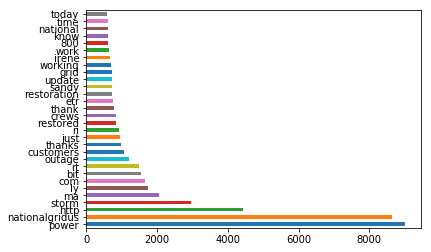

In [33]:
%matplotlib inline
text.sum().sort_values(ascending = False).head(30).plot(kind = 'barh');

In [35]:
freq_all = pd.DataFrame(text.sum().sort_values(ascending = False).head(30), columns=['amount'])

In [36]:
freq_all['words'] = freq_all.index
freq_all.reset_index(inplace = True, drop = True)

In [37]:
freq_all

,amount,words
0,9010,power
1,8630,nationalgridus
2,4428,http
3,2963,storm
4,2062,ma
5,1742,ly
6,1652,com
7,1552,bit
8,1489,rt
9,1200,outage


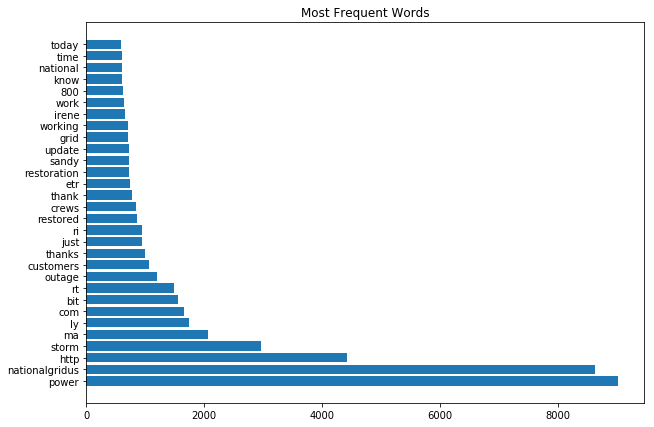

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title('Most Frequent Words')
plt.barh(freq_all['words'], freq_all['amount'], align = 'center');

Above we can see the words that are more frequently used. Usually in the tweets the publishers prefer giving a time frame. That's why words like `today` or `time` or`etr` are highly used. The regions are also very common to describe the affected areas. Since the hurricanes are one of the main reason of the outage, `Irene` and `Sandy` are used frequently. Also, users prefer attaching a link to the post, which increase the usage of `http`, `ly`, `com`. It is also self-explanotory to have `nationalgridus` in this chart as the biggest energy provider of the New England Area. 